In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = x.view(-1, self.num_flat_features(x)) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)
net.zero_grad()
out.backward(torch.randn(1, 10))
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss.grad_fn)

tensor([[-0.0226, -0.0879, -0.0493,  0.0510,  0.0651,  0.1047,  0.0009, -0.0192,
          0.0933, -0.0181]], grad_fn=<AddmmBackward>)


In [8]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0057,  0.0182, -0.0117,  0.0009,  0.0014,  0.0005])


# Training a classifier


In [2]:
import torchvision
import torchvision.transforms as transforms
import torch

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='D:/', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='D:/', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

tensor(4)


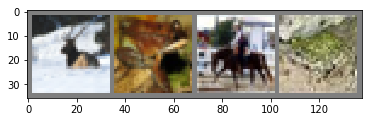

 deer  frog horse  frog


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels[0])
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
images[0]

tensor([[[-0.2706, -0.2941, -0.2863,  ..., -0.2941, -0.2549, -0.1608],
         [-0.3176, -0.3333, -0.3255,  ..., -0.3725, -0.3490, -0.3098],
         [-0.2784, -0.3020, -0.2941,  ..., -0.3412, -0.3255, -0.2941],
         ...,
         [-0.3569, -0.3490, -0.3176,  ..., -0.6941, -0.5843, -0.3882],
         [-0.3098, -0.3176, -0.2706,  ..., -0.4431, -0.3882, -0.3412],
         [-0.2471, -0.2627, -0.2863,  ..., -0.4039, -0.4039, -0.4196]],

        [[-0.1373, -0.1608, -0.1529,  ..., -0.1451, -0.1216, -0.0824],
         [-0.1843, -0.2000, -0.1922,  ..., -0.1765, -0.1843, -0.1843],
         [-0.1451, -0.1686, -0.1608,  ..., -0.1373, -0.1451, -0.1608],
         ...,
         [-0.4353, -0.4118, -0.3804,  ..., -0.7176, -0.6157, -0.4431],
         [-0.3882, -0.3882, -0.3490,  ..., -0.4902, -0.4431, -0.3961],
         [-0.3176, -0.3255, -0.3569,  ..., -0.4510, -0.4510, -0.4745]],

        [[-0.0588, -0.0745, -0.0745,  ..., -0.0510, -0.0353,  0.0039],
         [-0.1059, -0.1216, -0.1137,  ..., -0

In [15]:
for epoch in range(1):
    
    running_loss = 0.0 
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        # forward + backward + optimize
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print sta
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0   
            
print('Finished Training')

[1,  2000] loss: 2.242
[1,  4000] loss: 1.889
[1,  6000] loss: 1.675
[1,  8000] loss: 1.564
[1, 10000] loss: 1.497
[1, 12000] loss: 1.437
Finished Training


In [16]:
Saving_path = 'D:/PYTORCH_CODE/cifar_net.pth'
torch.save(net.state_dict(),Saving_path)

In [17]:
'''检验'''
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        imgs, labs = data
        outputs = net(imgs)
        ind, predicted = torch.max(outputs.data, 1)
        total += labs.size(0)
        correct += (predicted == labs).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 80 %
Accuracy of  bird : 23 %
Accuracy of   cat : 22 %
Accuracy of  deer : 56 %
Accuracy of   dog : 35 %
Accuracy of  frog : 68 %
Accuracy of horse : 56 %
Accuracy of  ship : 37 %
Accuracy of truck : 51 %
